In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack
from sklearn.compose import ColumnTransformer

In [3]:
data = pd.read_csv('spotify_songs_cleaned.csv')

data

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,text,subgenre,genre
0,28,0.303,0.880,9,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,"i feel alive steady rollin the trees, are sing...",hard rock,rock
1,0,0.845,0.652,6,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,"poison bell biv devoe na yeah, spyderman and f...",new jack swing,r&b
2,41,0.425,0.378,5,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,baby it's cold outside (feat. christina aguile...,neo soul,r&b
3,65,0.760,0.887,9,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,dumb litty kard get up out of my business you ...,dance pop,pop
4,70,0.496,0.639,6,-6.157,1,0.0550,0.28000,0.000000,0.0975,0.305,147.764,224720,"soldier james tw hold your breath, don't look ...",urban contemporary,r&b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14543,72,0.744,0.715,0,-6.103,1,0.3510,0.10100,0.000000,0.0919,0.340,154.962,179773,"some way nav yeah, nah, nah, nah, nah, nah, na...",urban contemporary,r&b
14544,0,0.479,0.800,10,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,rising like the sun - radio mix qulinez caught...,progressive electro house,edm
14545,49,0.963,0.603,2,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240,"anaconda nicki minaj my anaconda don't, my ana...",electropop,pop
14546,40,0.458,0.540,5,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,"bound ponderosa twins plus one bound, bound bo...",neo soul,r&b


___
Бейзлайн


In [4]:
#Предсказываем самый популярный класс в данных
class MostPopularClass:
    def fit(self, X, y):
        self.most_popular_class = y.value_counts().idxmax()
    def predict(self, X):
        return np.array([self.most_popular_class] * len(X))
    
X = data.drop(columns=['genre', 'subgenre'])
y = data['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pred = MostPopularClass()

pred.fit(X_train, y_train)
y_pred = pred.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         edm       0.00      0.00      0.00       350
         pop       0.26      1.00      0.42       764
         r&b       0.00      0.00      0.00       631
         rap       0.00      0.00      0.00       514
        rock       0.00      0.00      0.00       651

    accuracy                           0.26      2910
   macro avg       0.05      0.20      0.08      2910
weighted avg       0.07      0.26      0.11      2910



c:\GitHub\ml_music_classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\ml_music_classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\ml_music_classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

___
Базовые модели


In [5]:
#Numerical features
X = data.select_dtypes(include=[np.number])
y = data['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         edm       0.52      0.43      0.47       350
         pop       0.48      0.53      0.50       764
         r&b       0.52      0.47      0.49       631
         rap       0.61      0.56      0.58       514
        rock       0.60      0.68      0.64       651

    accuracy                           0.54      2910
   macro avg       0.54      0.53      0.54      2910
weighted avg       0.54      0.54      0.54      2910



In [6]:
#Text
from sklearn.feature_extraction.text import CountVectorizer

pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('logreg', LogisticRegression())
])


X_train, X_test, y_train, y_test = train_test_split(data['text'], y, test_size=0.2, random_state=42)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

c:\GitHub\ml_music_classification\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         edm       0.41      0.37      0.39       350
         pop       0.48      0.48      0.48       764
         r&b       0.51      0.50      0.51       631
         rap       0.71      0.68      0.70       514
        rock       0.60      0.67      0.63       651

    accuracy                           0.55      2910
   macro avg       0.54      0.54      0.54      2910
weighted avg       0.55      0.55      0.55      2910



___
Объединим текстовые признаки и численные, изменим векторайзер на TF-IDF


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer


X = data.drop(columns=['genre', 'subgenre'])
y = data['genre']

text_column = 'text'
num_columns = X.drop(columns=['text']).columns


text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer())
])


num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_pipeline, text_column),
        ('num', num_pipeline, num_columns)
    ],
    remainder='passthrough'
)


pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

c:\GitHub\ml_music_classification\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         edm       0.60      0.46      0.52       350
         pop       0.55      0.63      0.58       764
         r&b       0.62      0.59      0.61       631
         rap       0.77      0.72      0.74       514
        rock       0.72      0.75      0.73       651

    accuracy                           0.64      2910
   macro avg       0.65      0.63      0.64      2910
weighted avg       0.65      0.64      0.64      2910



___
Произведем feature engineering

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize


def get_text_length(x):
    return np.array([len(t) for t in x]).reshape(-1, 1)

def get_word_count(x):
    return np.array([len(word_tokenize(t)) for t in x]).reshape(-1, 1)

def get_unique_word_count(x):
    return np.array([len(set(word_tokenize(t))) for t in x]).reshape(-1, 1)

def get_sentiment(x):
    return np.array([TextBlob(t).sentiment.polarity for t in x]).reshape(-1, 1)

def mean_word_length(x):
    return np.array([np.mean([len(w) for w in word_tokenize(t)]) for t in x]).reshape(-1, 1)

def mean_syllable_count(x):
    return np.array([np.mean([len(list(filter(lambda x: x.lower() in 'aeiouy', w))) for w in word_tokenize(t)]) for t in x]).reshape(-1, 1)

def get_sentences_count(x):
    return np.array([len(x.split('.')) for x in x]).reshape(-1, 1)

def vocabulary_size(x):
    return np.array([len(set(word_tokenize(x))) for x in x]).reshape(-1, 1)

def sentence_similarity(text):
    sentences = sent_tokenize(text)

    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
    similarity_matrix = cosine_similarity(tfidf_matrix)

    return similarity_matrix.mean()

data['text_length'] = get_text_length(data['text'])
data['word_count'] = get_word_count(data['text'])
data['unique_word_count'] = get_unique_word_count(data['text'])
data['sentiment'] = get_sentiment(data['text'])
data['mean_word_length'] = mean_word_length(data['text'])
data['mean_syllable_count'] = mean_syllable_count(data['text'])
data['sentences_count'] = get_sentences_count(data['text'])
data['vocabulary_size'] = vocabulary_size(data['text'])
data['sentence_similarity'] = data['text'].apply(sentence_similarity)

In [9]:
# Кластеринг 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)

X = data.select_dtypes(include=[np.number])
data['cluster'] = kmeans.fit_predict(X)

#OneHotEncoding для кластеров
data = pd.get_dummies(data, columns=['cluster'])

___
Feature engineering + стратификация

In [10]:
X = data.copy()
X.drop(columns=['genre', 'subgenre'], inplace=True)

y = data['genre']

text_column = 'text'
num_columns = X.drop(columns=['text']).columns

text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer())
])

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_pipeline, text_column),
        ('num', num_pipeline, num_columns)
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

c:\GitHub\ml_music_classification\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         edm       0.61      0.53      0.56       352
         pop       0.58      0.59      0.59       748
         r&b       0.63      0.62      0.62       632
         rap       0.75      0.74      0.75       500
        rock       0.72      0.76      0.74       678

    accuracy                           0.66      2910
   macro avg       0.66      0.65      0.65      2910
weighted avg       0.66      0.66      0.66      2910



___
Модифицируем векторизацию текста

In [11]:
import tqdm
tqdm.tqdm.pandas()


#Удалим из текста все что не является буквами
import re

def clean_text(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)

data1 = data.copy()
data1['text'] = data1['text'].progress_apply(clean_text)


#Лемматизация
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(w) for w in text.split()])

data1['text'] = data1['text'].progress_apply(lemmatize_text)

100%|██████████| 14548/14548 [00:21<00:00, 664.45it/s]


In [12]:
X = data1.copy()
X.drop(columns=['genre', 'subgenre'], inplace=True)

y = data1['genre']

text_column = 'text'
num_columns = X.drop(columns=['text']).columns

text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer())
])

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_pipeline, text_column),
        ('num', num_pipeline, num_columns)
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

c:\GitHub\ml_music_classification\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         edm       0.60      0.53      0.56       352
         pop       0.59      0.60      0.59       748
         r&b       0.63      0.60      0.62       632
         rap       0.75      0.75      0.75       500
        rock       0.71      0.77      0.74       678

    accuracy                           0.66      2910
   macro avg       0.66      0.65      0.65      2910
weighted avg       0.65      0.66      0.65      2910



___
Градиентный бустинг


In [13]:
from catboost import CatBoostClassifier

X = data1.copy()
X.drop(columns=['genre', 'subgenre'], inplace=True)

y = data1['genre']

text_column = 'text'
num_columns = X.drop(columns=['text']).columns

text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer())
])

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_pipeline, text_column),
        ('num', num_pipeline, num_columns)
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier())
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

Learning rate set to 0.089677
0:	learn: 1.5380470	total: 2.58s	remaining: 42m 54s
1:	learn: 1.4844269	total: 4.54s	remaining: 37m 47s
2:	learn: 1.4345547	total: 5.77s	remaining: 31m 58s
3:	learn: 1.3930179	total: 7.05s	remaining: 29m 15s
4:	learn: 1.3566326	total: 8.13s	remaining: 26m 58s
5:	learn: 1.3319196	total: 9.24s	remaining: 25m 31s
6:	learn: 1.3050351	total: 10.3s	remaining: 24m 17s
7:	learn: 1.2761223	total: 11.4s	remaining: 23m 32s
8:	learn: 1.2551126	total: 12.4s	remaining: 22m 47s
9:	learn: 1.2360829	total: 13.5s	remaining: 22m 12s
10:	learn: 1.2181348	total: 14.5s	remaining: 21m 43s
11:	learn: 1.2018544	total: 15.6s	remaining: 21m 20s
12:	learn: 1.1843554	total: 16.6s	remaining: 20m 58s
13:	learn: 1.1676376	total: 17.6s	remaining: 20m 40s
14:	learn: 1.1510773	total: 18.8s	remaining: 20m 31s
15:	learn: 1.1373999	total: 19.8s	remaining: 20m 16s
16:	learn: 1.1260055	total: 20.8s	remaining: 20m 3s
17:	learn: 1.1142964	total: 21.9s	remaining: 19m 52s
18:	learn: 1.1025703	total:

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         edm       0.74      0.64      0.69       352
         pop       0.62      0.63      0.63       748
         r&b       0.67      0.64      0.65       632
         rap       0.76      0.78      0.77       500
        rock       0.75      0.81      0.78       678

    accuracy                           0.70      2910
   macro avg       0.71      0.70      0.70      2910
weighted avg       0.70      0.70      0.70      2910



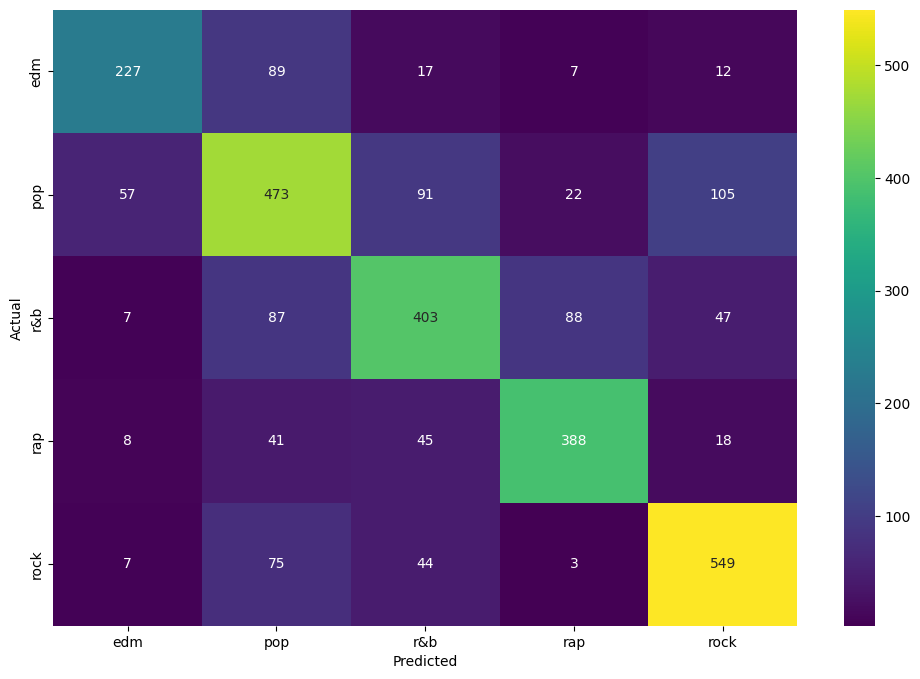

In [15]:
#Построим confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=pipe.classes_, yticklabels=pipe.classes_, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

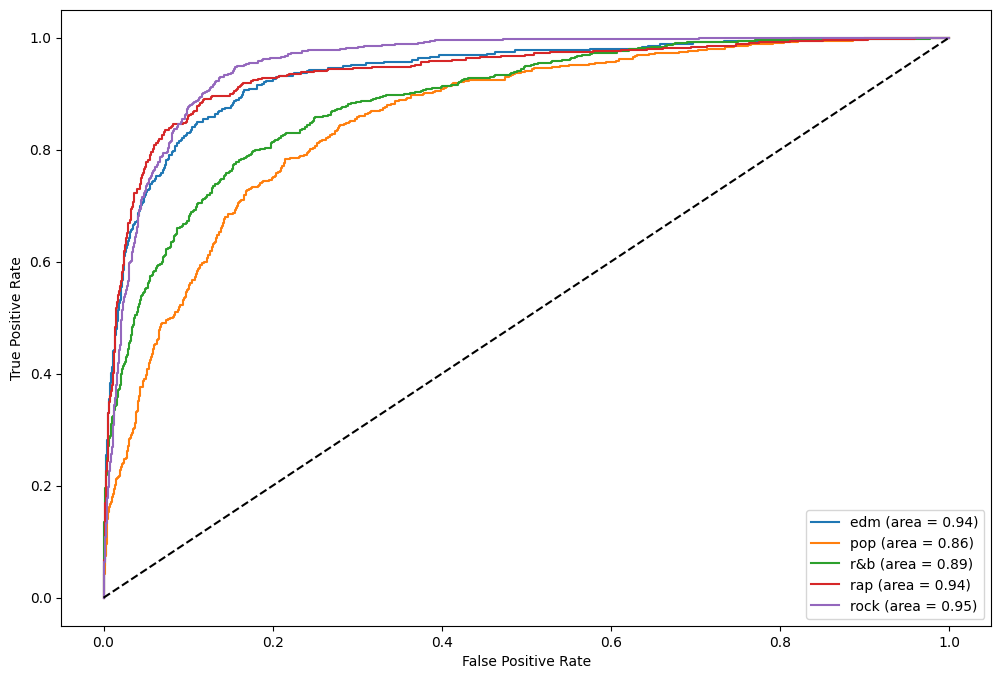

ROC AUC: 0.9141612502126971


In [17]:
#Построим ROC-кривую
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y_test, classes=pipe.classes_)
y_pred_bin = pipe.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(pipe.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_pred_bin[:, i])

plt.figure(figsize=(12, 8))

for i in range(len(pipe.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'{pipe.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('ROC AUC:', roc_auc_score(y_bin, y_pred_bin, average='macro'))


**Финальные метрики:**

Accuracy - 0.70

F1 - 0.70 (macro avg)

ROC-AUC - 0.914 (macro avg)